# Detecting and examining gender bias in the NDC dataset 


The primary goal of this project is to build metrics of bias (here focusing on gender bias).

Author: <b>Jamell Dacon</b> (daconjam@msu.edu)

In [1]:
import json
import pandas as pd
import sys
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
from nltk.tokenize import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings('ignore')

/opt/anaconda/lib/python3.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


## News 

The news.tsv file contains the details of the information of news articles involved in the behaviors.tsv file. It has 7 columns , which are divided by tab symbols.

In [2]:
with open('News_Category_Dataset_v2.json') as json_file:      
    data = json_file.readlines()
    #It converts all strings in list to actual json objects. 
    data = list(map(json.loads, data)) 
    
df = pd.DataFrame(data)

In [3]:
df = df.drop(['authors','date','headline','link'], axis=1)

df['Gender'] = 'N/A'
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

df.head()

,Gender,category,short_description
0,N/A,CRIME,She left her husband. He killed their children...
1,N/A,ENTERTAINMENT,Of course it has a song.
2,N/A,ENTERTAINMENT,The actor and his longtime girlfriend Anna Ebe...
3,N/A,ENTERTAINMENT,The actor gives Dems an ass-kicking for not fi...
4,N/A,ENTERTAINMENT,"The ""Dietland"" actress said using the bags is ..."


In [4]:
female = ['goddesses', 'niece', 'baroness', 'mother', 'duchesses', 'mom', 'belle', 'belles', 'mummies', 'policewoman',
          'grandmother', 'landlady', 'landladies', 'nuns', 'stepdaughter', 'milkmaids', 'chairwomen', 'stewardesses',
          'women', 'masseuses', 'daughter-in-law', 'priestesses', 'stewardess', 'empress', 'daughter', 'queens',
          'proprietress', 'brides', 'lady', 'queen', 'matron', 'waitresses', 'mummy', 'empresses', 'madam', 
          'witches', 'sorceress', 'lass', 'milkmaid', 'granddaughter', 'grand-daughter', 'congresswomen','moms', 'manageress', 
          'princess', 'stepmothers', 'stepdaughters', 'girlfriend', 'shepherdess', 'females', 'grand-mothers', 'grandmothers'
          'step-daughter', 'nieces', 'priestess', 'wife', 'mothers', 'usherette', 'postwoman', 'hinds', 'wives', 
          'murderess', 'hostess', 'girl', 'waitress', 'spinster', 'shepherdess', 'businesswomen', 'duchess', 'madams', 'mamas',
          'nun', 'heiress', 'aunt', 'princesses', 'fiancee', 'mrs', 'ladies', 'mother-in-law', 'actress', 'actresses', 
          'postmistress', 'headmistress', 'heroines', 'bride', 'businesswoman', 'baronesses', 'sows', 'witch',
          'daughters-in-law','aunts', 'huntress', 'lasses', 'mistress', 'mistresses', 'sister', 'hostesses', 'poetess', 
          'masseuse', 'heroine', 'goddess','grandma', 'grandmas', 'maidservant', 'heiresses', 'patroness',
          'female', 'governesses', 'millionairess', 'congresswoman', 'dam', 'widow', 'granddaughters', 'grand-daughters', 'headmistresses', 
          'girls', 'she', 'policewomen', 'step-mother','stepmother', 'widows', 'abbess', 'mrs.', 'chairwoman', 'sisters',
          'mama', 'woman','daughters', 'girlfriends', 'she’s', 'her', 'maid', 'countess', 'giantess', 'poetess', 'jew',
          'mayoress', 'peeress', 'negress', 'abbess', 'traitress', 'benefactress', 'instructress', 'conductress', 'founder',
          'huntress', 'temptress', 'enchantress', 'songstress', 'murderess', 'murderesses', 'patronesses', 'authoress', 'czarina',
          'spokeswoman', 'spokeswomen', 'ma', 'councilwoman', 'council-woman', 'councilwomen', 'council-women', 'mum', 'lesbian', 'lesbians', 'breast', 'breasts'
          'maiden', 'maidens', 'sorority', 'sororities', 'saleswoman', 'dudette', 'maternal', 'feminist', 'feminists', 'sisterhood', 
          'housewife', 'housewives', 'stateswoman', 'stateswomen', 'countrywoman', 'countrywomen', 'chick', 'chicks', 'mommy',
          'strongwoman', 'strongwomen', 'babe', 'babes', 'diva', 'divas', 'feminine', 'feminism', 'gal', 'gals', 'sistren', 'schoolgirl',
          'schoolgirls', 'matriarch', 'matriarchy', 'motherhood', 'wifey', 'sis', 'femininity', 'ballerina', 'ballerinas', 'granny', 
          'grannies', 'mami', 'momma', "ma'am", 'gf', 'gfs', 'damsel', 'damsels', 'vixen', 'vixens', 'nan', 'nanny', 'nannies',
          'auntie', 'womenfolk', 'sisterly', 'motherly', 'homegirl', 'homegirls', 'grand-neice', 'grand-neices',
          'grandneice', 'grandneices', 'jane doe', 'noblewoman', 'noblewomen', 'dream girl', 'madame', 'herself', 'hers']

In [5]:
male = ['god', 'gods', 'nephew', 'nephews', 'him', 'baron', 'father', 'fathers' 'dukes', 'dad', 'beau', 'beaus', 'daddies',
        'policeman', 'policemen', 'grandfather', 'landlord', 'landlords', 'monk', 'monks', 'step-son', 'step-sons', 
        'milkmen', 'chairmen', 'chairman', 'steward', 'men', 'masseurs', 'son-in-law', 'priest', 'king', 'governor', 
        'waiter', 'daddy', 'steward', 'emperor', 'son', 'proprietor', 'groom', 'grooms', 'gentleman', 'gentlemen', 'sir', 
        'wizards', 'sorcerer', 'lad','milk-man', 'grandson', 'grand-son','congressmen','dads', 'manager', 'prince', 'stepfathers', 
        'boyfriend', 'shepherd', 'shepherds', 'males', 'grandfathers', 'grand-fathers', 'husband', 'usher', 'postman','stags', 
        'husbands', 'host', 'boy', 'waiter', 'bachelor', 'bachelors', 'businessmen', 'duke', 'sirs', 'papas', 'heir', 'uncle', 
        'princes', 'fiance', 'mr', 'lords', 'father-in-law', 'actor', 'actors', 'postmaster', 'headmaster', 'heroes',
        'businessman', 'boars','wizard', 'sons-in-law', 'fiances', 'uncles', 'hunter', 'lads', 'masters', 'brother', 
        'hosts', 'poet', 'hero', 'grandpa', 'grandpas','manservant', 'heirs', 'male', 'tutors', 'millionaire',
        'congressman', 'sire', 'sires', 'widower','grandsons', 'grand-sons','boys', 'he', 'step-father', 'jewess', 'bridegroom', 'bridegrooms'
        'stepfather', 'widowers', 'abbot', 'mr.,' 'brothers', 'man', 'sons', 'boyfriends', 'he’s', 'his', 'earl', 
        'giant', 'count', 'stepson', 'stepsons', 'poet', 'mayor', 'peer', 'negro', 'abbot', 'traitor', 'benefactor',
        'instructor', 'conductor', 'founder', 'founders', 'hunters', 'huntresses', 'tempt', 'enchanter', 'enchanters', 'songster', 
        'songsters', 'murderer', 'murderers', 'patron', 'patrons', 'author', 'czar', 'guy', 'spokesman', 'spokesmen',
        'pa', 'councilman', 'council-man', 'councilmen', 'council-men', 'gay', 'gays', 'prostate cancer', 'fraternity', 'fraternities', 'salesman', 'dude', 'dudes', 'paternal',
        'brotherhood', 'statesman', 'statesmen', 'countryman', 'countrymen', 'suitor', 'macho', 'papa', 'strongman', 'strongmen',
        'boyhood', 'manhood', 'masculine', 'macho', 'horsemen', 'brethren', 'chap','chaps', 'schoolboy', 'schoolboys', 'bloke',
        'blokes', 'patriarch', 'patriachy', 'fatherhood', 'hubby', 'hubbies', 'fella', 'fellas', 'handyman', 'fraternal', 
        'bro', 'masculinity', 'ballerino', 'pappy', 'papi', 'pappies', 'dada', 'bf', 'bfs', 'knights', 'knight', 
        'menfolk', 'brotherly', 'manly', 'pimp', 'pimps', 'homeboy', 'homeboys','grandnephew', 'grand-nephew',
        'grand-nephew', 'grand-nephews', 'john doe', 'nobleman', 'noblemen', 'dream boy', 'himself', 'gramps']

In [6]:
gender_words  = len(female) + len(male)
print('The total no. of gender words are', gender_words)

The total no. of gender words are 465


In [7]:
df.rename(columns = {'category':'Category'}, inplace = True) 
df.rename(columns = {'short_description':'Abstract'}, inplace = True) 

In [8]:
df['Category'] = df['Category'].str.lower() #make the abstract lowercase 
df['Abstract'] = df['Abstract'].str.lower() #make the abstract lowercase 

In [9]:
df['Abstract'] = df['Abstract'].apply(str) # ensures the sentences are strings

In [10]:
len(df['Abstract'])

200853

In [11]:
df.shape

(200853, 3)

In [12]:
df = df.dropna()
df.head()

,Gender,Category,Abstract
0,N/A,crime,she left her husband. he killed their children...
1,N/A,entertainment,of course it has a song.
2,N/A,entertainment,the actor and his longtime girlfriend anna ebe...
3,N/A,entertainment,the actor gives dems an ass-kicking for not fi...
4,N/A,entertainment,"the ""dietland"" actress said using the bags is ..."


In [13]:
len(df['Abstract'])

200853

In [14]:
# Here we count the male and female gender words in each abstract and 
# determine a specific gender tag per abstract

m_dict, f_dict = {}, {}

for index, line in enumerate(df['Abstract']):
    words = line.split() 
    
    m, f = 0, 0  #counters for male and female words 
    
    for w in words:
        if w in male: #checks into list of male words 
            m += 1 
            if w in m_dict: #counts the male words in the abstracts
                m_dict[w] += 1
            else:
                m_dict[w] = 1
        
            
        elif w in female: #checks into list of female words 
            f += 1
            if w in f_dict: #counts the male words in the abstracts
                f_dict[w] += 1
            else:
                f_dict[w] = 1
            
    # Here we determine the tags of the abstracts        
    if m > f:
        df.loc[index, 'Gender'] = 'M'
        
    elif m == f:
        df.loc[index, 'Gender'] = 'Neutral'
        
    elif f > m:
        df.loc[index, 'Gender'] = 'F'


In [15]:
sorted(m_dict.items(), key=lambda x: x[1], reverse=True)

[('his', 9906),
 ('he', 9107),
 ('him', 1803),
 ('man', 1254),
 ('men', 1114),
 ('gay', 710),
 ('host', 647),
 ('son', 599),
 ('husband', 559),
 ('actor', 427),
 ('father', 414),
 ('dad', 393),
 ('guy', 355),
 ('boy', 342),
 ('himself', 331),
 ('author', 317),
 ('governor', 297),
 ('boys', 278),
 ('male', 272),
 ('god', 269),
 ('king', 249),
 ('giant', 222),
 ('he’s', 203),
 ('prince', 190),
 ('mayor', 173),
 ('founder', 173),
 ('count', 145),
 ('dads', 142),
 ('manager', 139),
 ('brother', 129),
 ('spokesman', 112),
 ('boyfriend', 109),
 ('actors', 104),
 ('chairman', 102),
 ('congressman', 94),
 ('hero', 86),
 ('heroes', 81),
 ('sons', 70),
 ('daddy', 59),
 ('duke', 57),
 ('hosts', 57),
 ('groom', 52),
 ('gays', 52),
 ('uncle', 50),
 ('sir', 45),
 ('grooms', 44),
 ('masters', 37),
 ('bachelor', 37),
 ('poet', 33),
 ('hunter', 32),
 ('businessman', 31),
 ('peer', 31),
 ('knight', 30),
 ('instructor', 29),
 ('dude', 28),
 ('gods', 26),
 ('founders', 25),
 ('usher', 24),
 ('beau', 22),


In [16]:
len(m_dict)

164

In [17]:
sorted(f_dict.items(), key=lambda x: x[1], reverse=True)

[('her', 8374),
 ('she', 5866),
 ('women', 2701),
 ('woman', 1057),
 ('mother', 882),
 ('mom', 678),
 ('daughter', 606),
 ('actress', 582),
 ('girls', 578),
 ('girl', 552),
 ('female', 385),
 ('moms', 376),
 ('wife', 367),
 ('mothers', 260),
 ('lady', 251),
 ('breast', 228),
 ('queen', 192),
 ('herself', 187),
 ('ladies', 187),
 ('bride', 171),
 ('princess', 163),
 ('sister', 146),
 ('brides', 143),
 ('daughters', 125),
 ('girlfriend', 97),
 ('motherhood', 92),
 ('she’s', 89),
 ('lesbian', 87),
 ('feminist', 86),
 ('mommy', 74),
 ('mrs.', 72),
 ('duchess', 70),
 ('sisters', 70),
 ('grandmother', 58),
 ('maternal', 48),
 ('feminine', 47),
 ('actresses', 45),
 ('mama', 43),
 ('grandma', 43),
 ('spokeswoman', 42),
 ('witch', 34),
 ('feminism', 33),
 ('aunt', 31),
 ('wives', 29),
 ('queens', 27),
 ('housewives', 26),
 ('congresswoman', 25),
 ('lesbians', 25),
 ('diva', 22),
 ('nanny', 22),
 ('hostess', 21),
 ('mother-in-law', 20),
 ('females', 19),
 ('widow', 17),
 ('granddaughter', 16),
 

In [18]:
len(f_dict)

145

In [19]:
df.reset_index(drop=True)
df.head(10)

,Gender,Category,Abstract
0,F,crime,she left her husband. he killed their children...
1,Neutral,entertainment,of course it has a song.
2,M,entertainment,the actor and his longtime girlfriend anna ebe...
3,M,entertainment,the actor gives dems an ass-kicking for not fi...
4,F,entertainment,"the ""dietland"" actress said using the bags is ..."
5,M,entertainment,"""it is not right to equate horrific incidents ..."
6,Neutral,entertainment,"it's catchy, all right."
7,Neutral,entertainment,there's a great mini-series joining this week.
8,Neutral,entertainment,"myer's kids may be pushing for a new ""powers"" ..."
9,Neutral,entertainment,you're getting a recent academy award-winning ...


In [20]:
df.Gender.unique()

array(['F', 'Neutral', 'M'], dtype=object)

In [21]:
df['Gender'].value_counts()

Neutral    163747
M           21250
F           15856
Name: Gender, dtype: int64

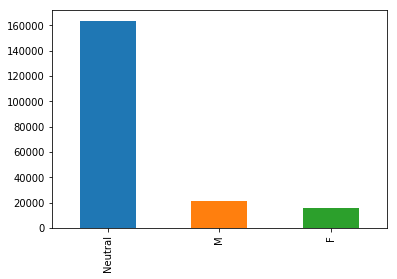

In [22]:
df['Gender'].value_counts().plot(kind='bar')

In [23]:
# Here we will count the number of news in each category for each gender
df['Count'] = 1

In [24]:
df_obs = df.groupby(['Gender', 'Category']).agg({'Count':sum})
df_obs

Count
Gender  Category             
F       arts               92
        arts & culture    138
        black voices      510
        business          256
        college            40
        comedy            160
        crime             293
        culture & arts     93
        divorce           470
        education          44
        entertainment    1573
        environment        97
        fifty             179
        food & drink      138
        good news          96
        green              94
        healthy living    274
        home & living     173
        impact            400
        latino voices     121
        media             131
        money              81
        parenting        1840
        parents           597
        politics         1402
        queer voices      528
        religion          115
        science            54
        sports            170
        style             171
...                       ...
Neutral environment      1099
        fifty            1059
        food & drink     5880
        good news        1147
        green            2336
        healthy living   6212
        home & living    3850
        impact           2797
        latino voices     859
        media            2284
        money            1522
        parenting        5693
        parents          2966
        politics        25952
        queer voices     4544
        religion         2118
        science          1983
        sports           3902
        style            2034
        style & beauty   6938
        taste            2000
        tech             1864
        the worldpost    3136
        travel           9008
        weddings         2612
        weird news       2302
        wellness        15919
        women            2362
        world news       1813
        worldpost        2323

[123 rows x 1 columns]

In [25]:
len(df['Category'])

200853

In [26]:
df['Category'].value_counts()

politics          32739
wellness          17827
entertainment     16058
travel             9887
style & beauty     9649
parenting          8677
healthy living     6694
queer voices       6314
food & drink       6226
business           5937
comedy             5175
sports             4884
black voices       4528
home & living      4195
parents            3955
the worldpost      3664
weddings           3651
women              3490
impact             3459
divorce            3426
crime              3405
media              2815
weird news         2670
green              2622
worldpost          2579
religion           2556
style              2254
science            2178
world news         2177
taste              2096
tech               2082
money              1707
arts               1509
fifty              1401
good news          1398
arts & culture     1339
environment        1323
college            1144
latino voices      1129
culture & arts     1030
education          1004
Name: Category, 

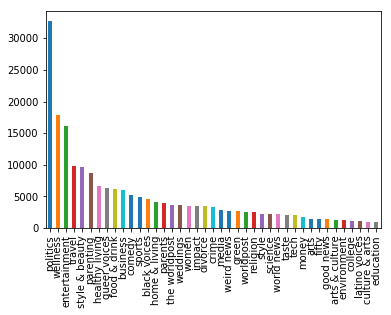

In [27]:
df['Category'].value_counts().plot(kind='bar')

In [28]:
# Here we create sentiment columns 

df['Neg'] = 0
df['Neu'] = 0
df['Pos'] = 0

In [29]:
analyzer = SentimentIntensityAnalyzer()
df['Abstract'] = df['Abstract'].apply(str) # ensures the sentences are strings

for index, line in enumerate(df['Abstract']):
    # Tokenize each sentence 
    sent_text = nltk.sent_tokenize(line)
    ps,ng,ne = 0,0,0 # positive, negative and neutrals counters 
    
    # Determine the sentiment of each sentence
    for i, sentence in enumerate(sent_text):
        comp = analyzer.polarity_scores(sentence)['compound']
        
        if comp >= 0.05:
            ps +=1 
            
        elif comp <= -0.05:
            ng +=1 
            
        else:
            ne += 1 

    # Here we determine the sentiments of the abstracts
    
    if (len(sent_text)==1):
        if (ps >= ne) and (ps > ng):
            df.loc[index, 'Pos'] = 1

        elif (ps < ne) and (ne > ng):
            df.loc[index, 'Neu'] = 1

        elif (ps < ng) and (ne <= ng):
            df.loc[index, 'Neg'] = 1
         
    elif (ps >= ne) and (ps > ng) and (len(sent_text)!=1):
        df.loc[index, 'Pos'] = 1

    elif (ps < ne) and (ne > ng) and (len(sent_text)!=1):
        df.loc[index, 'Neu'] = 1

    elif (ps < ng) and (ne <= ng) and (len(sent_text)!=1):
        df.loc[index, 'Neg'] = 1
        
    elif (ps == ng) and (len(sent_text)!=1):
        df.loc[index, 'Neu'] = 1
            

        
df.head(10)

,Gender,Category,Abstract,Count,Neg,Neu,Pos
0,F,crime,she left her husband. he killed their children...,1,0,1,0
1,Neutral,entertainment,of course it has a song.,1,0,1,0
2,M,entertainment,the actor and his longtime girlfriend anna ebe...,1,0,1,0
3,M,entertainment,the actor gives dems an ass-kicking for not fi...,1,0,0,1
4,F,entertainment,"the ""dietland"" actress said using the bags is ...",1,0,1,0
5,M,entertainment,"""it is not right to equate horrific incidents ...",1,1,0,0
6,Neutral,entertainment,"it's catchy, all right.",1,0,1,0
7,Neutral,entertainment,there's a great mini-series joining this week.,1,0,0,1
8,Neutral,entertainment,"myer's kids may be pushing for a new ""powers"" ...",1,0,1,0
9,Neutral,entertainment,you're getting a recent academy award-winning ...,1,0,1,0


In [30]:
df['Neg'] = df['Neg'].astype(float)
df['Neu'] = df['Neu'].astype(float)
df['Pos'] = df['Pos'].astype(float)

In [31]:
# Here we create gender-specific dfs

male_df = df[df['Gender'] == 'M']
female_df = df[df['Gender'] == 'F']

In [32]:
# Here we create a male df and analyze the sentiments 

mneg_avg = (male_df['Neg'].sum())/(len(male_df))
mneu_avg = (male_df['Neu'].sum())/(len(male_df))
mpos_avg = (male_df['Pos'].sum())/(len(male_df))


print('The avg. negative sentiment for "M" is :', round(mneg_avg, 4), 
      '\nThe avg. neutral sentiment for "M" is :', round(mneu_avg, 4),
      '\nThe avg. positive sentiment for "M" is :', round(mpos_avg, 4))

The avg. negative sentiment for "M" is : 0.2651 
The avg. neutral sentiment for "M" is : 0.3572 
The avg. positive sentiment for "M" is : 0.3777


In [33]:
# Here we create a female df and analyze the sentiments 

fneg_avg = (female_df['Neg'].sum())/(len(female_df))
fneu_avg = (female_df['Neu'].sum())/(len(female_df))
fpos_avg = (female_df['Pos'].sum())/(len(female_df))


print('The avg. negative sentiment for "F" is :', round(fneg_avg, 4), 
      '\nThe avg. neutral sentiment for "F" is :', round(fneu_avg, 4),
      '\nThe avg. positive sentiment for "F" is :', round(fpos_avg, 4))

The avg. negative sentiment for "F" is : 0.2305 
The avg. neutral sentiment for "F" is : 0.3466 
The avg. positive sentiment for "F" is : 0.4229


In [34]:
femaledf_obs = female_df.groupby(['Gender', 'Category']).agg({'Neg':sum})
femaledf_obs

Neg
Gender Category             
F      arts             13.0
       arts & culture   34.0
       black voices    110.0
       business         47.0
       college          14.0
       comedy           27.0
       crime           167.0
       culture & arts   20.0
       divorce         118.0
       education         8.0
       entertainment   357.0
       environment      25.0
       fifty            36.0
       food & drink     13.0
       good news        17.0
       green            38.0
       healthy living   94.0
       home & living    13.0
       impact          115.0
       latino voices    31.0
       media            42.0
       money            26.0
       parenting       391.0
       parents         116.0
       politics        448.0
       queer voices    133.0
       religion         36.0
       science          13.0
       sports           53.0
       style            23.0
       style & beauty  272.0
       taste             6.0
       tech             12.0
       the worldpost    79.0
       travel           38.0
       weddings         94.0
       weird news       27.0
       wellness        257.0
       women           222.0
       world news       44.0
       worldpost        26.0

In [35]:
maledf_obs = male_df.groupby(['Gender', 'Category']).agg({'Neg':sum})
maledf_obs

Neg
Gender Category              
M      arts              33.0
       arts & culture    37.0
       black voices     252.0
       business         110.0
       college           36.0
       comedy           178.0
       crime            368.0
       culture & arts    27.0
       divorce          101.0
       education         12.0
       entertainment    463.0
       environment       22.0
       fifty             31.0
       food & drink      17.0
       good news         29.0
       green             62.0
       healthy living    46.0
       home & living     22.0
       impact            51.0
       latino voices     48.0
       media            144.0
       money             15.0
       parenting        217.0
       parents           45.0
       politics        1732.0
       queer voices     287.0
       religion          82.0
       science           21.0
       sports           211.0
       style              8.0
       style & beauty    68.0
       taste              6.0
       tech              29.0
       the worldpost    156.0
       travel            81.0
       weddings          53.0
       weird news        65.0
       wellness         227.0
       women             69.0
       world news       113.0
       worldpost         59.0

In [36]:
femaledf_obs = female_df.groupby(['Gender', 'Category']).agg({'Pos':sum})
femaledf_obs

Pos
Gender Category              
F      arts              51.0
       arts & culture    54.0
       black voices     203.0
       business         122.0
       college           12.0
       comedy            76.0
       crime             38.0
       culture & arts    48.0
       divorce          179.0
       education         21.0
       entertainment    652.0
       environment       32.0
       fifty             75.0
       food & drink      80.0
       good news         44.0
       green             31.0
       healthy living   111.0
       home & living    102.0
       impact           178.0
       latino voices     41.0
       media             36.0
       money             24.0
       parenting        776.0
       parents          269.0
       politics         448.0
       queer voices     226.0
       religion          42.0
       science           17.0
       sports            56.0
       style             80.0
       style & beauty  1166.0
       taste             20.0
       tech              29.0
       the worldpost     48.0
       travel           161.0
       weddings         324.0
       weird news        26.0
       wellness         388.0
       women            366.0
       world news        29.0
       worldpost         25.0

In [37]:
maledf_obs = male_df.groupby(['Gender', 'Category']).agg({'Pos':sum})
maledf_obs

Pos
Gender Category              
M      arts              96.0
       arts & culture    47.0
       black voices     284.0
       business         155.0
       college           35.0
       comedy           292.0
       crime             94.0
       culture & arts    92.0
       divorce          168.0
       education         22.0
       entertainment    777.0
       environment       57.0
       fifty             71.0
       food & drink     119.0
       good news         70.0
       green             66.0
       healthy living    94.0
       home & living     94.0
       impact           126.0
       latino voices     59.0
       media            101.0
       money             48.0
       parenting        503.0
       parents          178.0
       politics        1718.0
       queer voices     516.0
       religion         145.0
       science           63.0
       sports           293.0
       style             15.0
       style & beauty   242.0
       taste             37.0
       tech              53.0
       the worldpost     92.0
       travel           297.0
       weddings         198.0
       weird news        83.0
       wellness         420.0
       women             79.0
       world news        65.0
       worldpost         63.0

In [38]:
df.to_csv('NCD.csv')